***Group 21***
- Jiaming Chang
- Qianluo Zhu

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

print("packages imported")

packages imported


## **Problem Statement**:  

Develop a model of the charging cost, when we have information about battery capacity, energy consumed, charging duration, charging rate, and distance driven

## **Variables and parameters**:  


| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| regression coefficent for intercept | $\beta_0$ | - | parameter |
| Battery Capacity | $X_1$ | - | variable |
| regression coefficient for Battery Capacity| $\beta_1$ | -| parameter |
| Energy Consumed | $X_2$ | -| variable |
| regression coefficient for Energy Consumed | $\beta_2$ | - | parameter |
| Charging Duration | $X_3$ | - |  variable |
| regression coefficient for Charging Duration | $\beta_3$ | -| parameter |
| Charging rate | $X_4$ | - |  variable |
| regression coefficient for Charging rate | $\beta_4$ | - | parameter |
| distance driven | $X_5$ | - | variable |
| regression coefficient for distance driven | $\beta_5$ | - | parameter |
| Charging cost | $Y$ | - | variable |
| error | $\epsilon$ | - | variable |


## **Assumptions and Constraints:**  


- the model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \varepsilon$
- the average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- the variance of the error is constant: i.e., $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- the error is independent for each $\epsilon_i$ for all $i$
- owners would charge their batteries to full.
- the data is measured accurately

## **Build Solutions:**  

In [10]:
# import data
ev = pd.read_csv("ev_charging_NY.csv")
ev = pd.DataFrame(ev)
ev.head()

# From the prompt, we are suggested to choose some of the transformations, and these are the tranformations we chose:
# Taking the square root of the Distance Driven values;
# Creating a new variable called Total Energy = Charging Duration * Energy Consumed
# Taking the natural log of the Charging Rate.

ev["distance_mod"] = np.sqrt(ev['Distance_Driven'])
ev["total_energy"] = ev["Charging_Duration"]*ev["Energy_Consumed"]
ev["charging_rate_mod"] = np.log(ev["Charging_Rate"])
ev.head()

,Battery_Capacity,Energy_Consumed,Charging_Duration,Charging_Rate,Distance_Driven,Charging_cost,distance_mod,total_energy,charging_rate_mod
0,50.0,19.402524,2.052874,5.010838,111.922903,11.16,10.579362,39.830931,1.611603
1,75.0,50.530531,1.028886,34.636271,62.529153,21.22,7.907538,51.990138,3.544901
2,75.0,4.288320,2.459856,38.841667,107.396907,17.57,10.363248,10.548651,3.659494
3,100.0,77.295780,0.684295,5.971665,86.456851,13.18,9.298218,52.893128,1.787026
4,50.0,8.112448,1.652458,37.291554,286.342818,17.63,16.921667,13.405483,3.618767


In [17]:
X1 = ev[['Battery_Capacity',"Energy_Consumed",'Charging_Duration','Charging_Rate','Distance_Driven']]
Y1 = ev['Charging_cost']
X1 = sm.add_constant(X1)

reg_1 = sm.OLS(Y1,X1).fit()

summary_table=reg_1.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     356.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.90e-94
Time:                        05:30:08   Log-Likelihood:                -438.64
No. Observations:                 195   AIC:                             889.3
Df Residuals:                     189   BIC:                             908.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5538      1.04

The result shows that if modelling on the features given, there is a high probability of having strong multicollinearity or other problems with the model.  
So we switch to model on the modified features.

In [22]:
X2 = ev[['Battery_Capacity',"charging_rate_mod",'distance_mod','total_energy']]
Y2 = ev['Charging_cost']
X2 = sm.add_constant(X2)

reg_2 = sm.OLS(Y2,X2).fit()

summary_table=reg_2.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.430e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.32e-234
Time:                        05:32:33   Log-Likelihood:                -110.36
No. Observations:                 195   AIC:                             230.7
Df Residuals:                     190   BIC:                             247.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6660      0.22

## **Analyze and Assess:**

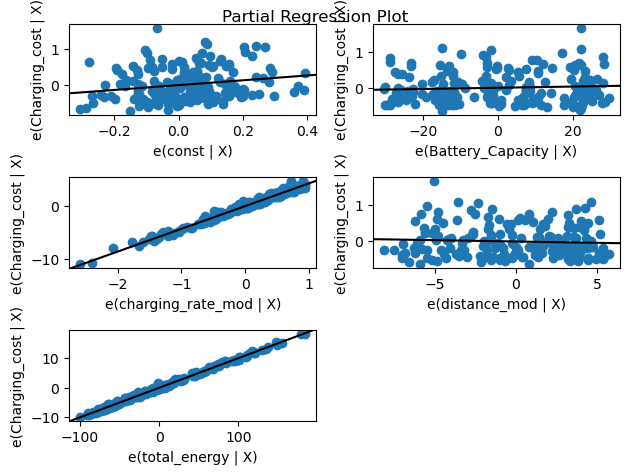

In [30]:
# Assumption 1: average value of the error is zero.
# we want to see linear trend for partial regression plot
sm.graphics.plot_partregress_grid(reg_2)
plt.show()

All of the plots passes the point(0,0), and most of them resemble a linear relationship. It is worth noticing that the plot for Battery capacity and distance does not resemble strong linear relationship

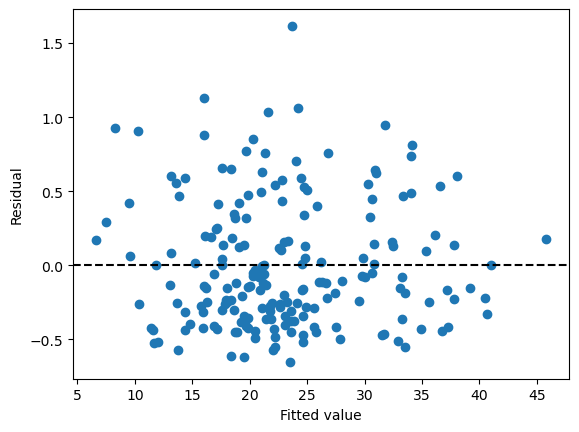

In [27]:
# assumption 2: variance is constant
# residual vs fitted plot 
fitted_y = reg_2.fittedvalues
residuals = reg_2.resid
plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

This assumption is checked as the plot did show scattered distribution

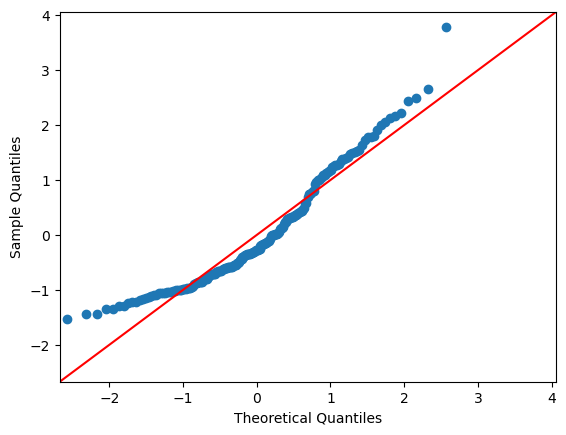

In [26]:
# Assumption 3:　Errors are normally distributed
#　normal QQ plot
residuals = reg_2.resid
sm.qqplot(residuals,fit=True, line="45")
plt.show()

It appears that there are some deviations away from the normality, especially at the tail (lower quantiles). This could indicate that the error does not follow a normal distribution.

## **Conclusion and Report**
